In [4067]:
import matplotlib.pylab as plt
from astropy.io import fits
import numpy as np
import pandas as pd
import os
import scipy.interpolate
from scipy.interpolate import splev, splrep
from scipy import interpolate
import scipy.interpolate as spi

In [4068]:
star = 'HIP3093'
Wave_Path = '/mnt_home/malikb/code/keck_rwav.fits'
Flux_Path = '/mnt_home/malikb/code/rj13.2073.fits'

wl_file = fits.open(Wave_Path)
fl_file = fits.open(Flux_Path)
wl_image = wl_file[0].data
fl_image = fl_file[0].data

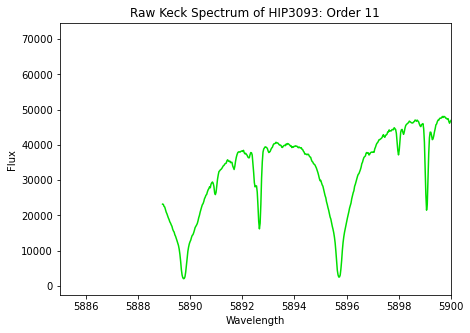

In [4069]:
plt.rcParams["figure.figsize"] = (7,5)

order = 11
wave = (wl_image[order])
flux = (fl_image[order])

plt.plot(wave,flux, "#01DF01")

plt.title('Raw Keck Spectrum of ' + star + ': Order ' + str(order))
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.xlim(5885,5900)
plt.show()

In [4070]:
wl_image[11,36]

5889.935433375593

In [4071]:
wl_image[11,252]

5895.923320801434

In [4072]:
bias = np.median(wl_image[-30:])
print(bias)

5614.096265287181


Text(0, 0.5, 'Flux')

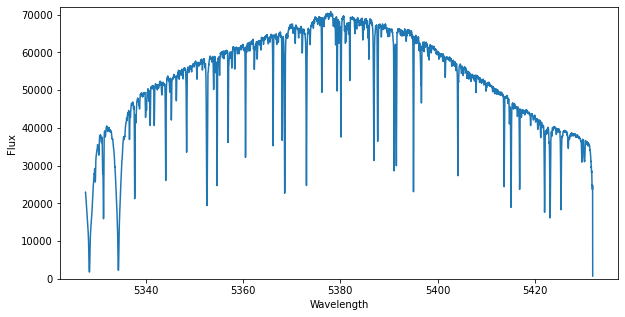

In [4073]:
plt.figure(figsize=(10,5))
wave_adjusted = wave - (0.1*bias)
flux_adjusted = flux - (0.05*bias)
plt.plot(wave_adjusted, flux_adjusted)
ymax = np.median(flux_adjusted)*1.3
plt.ylim(0,ymax)
plt.xlabel('Wavelength')
plt.ylabel('Flux')

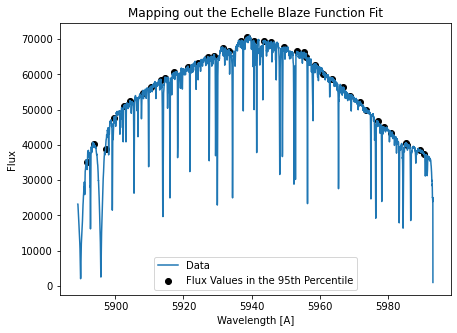

In [4074]:
bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wave_values = []
flux_values = []

for index in indices:
    ind = int(index)
    wave_values = np.append(wave_values, wave[ind])
    flux_values = np.append(flux_values, flux[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.scatter(wave_values, flux_values, color = 'black', label = 'Flux Values in the 95th Percentile')
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

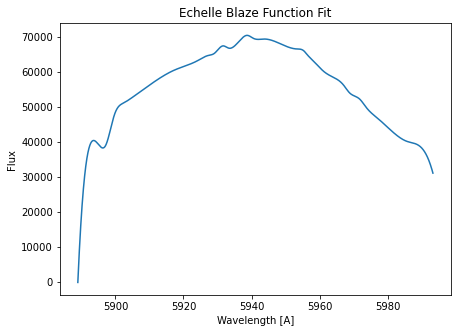

In [4075]:
spl = splrep(wave_values, flux_values, s = 500000)
flux_fit = splev(wave, spl)
plt.plot(wave, flux_fit)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

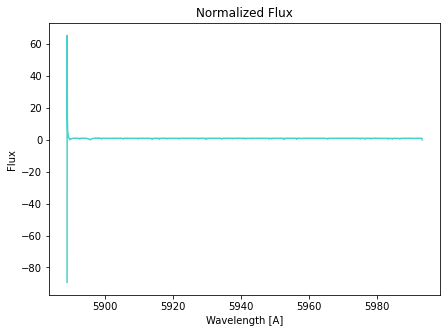

In [4076]:
first_normalized_flux = flux / flux_fit
plt.plot(wave, first_normalized_flux, "#48D1CC")
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.show()

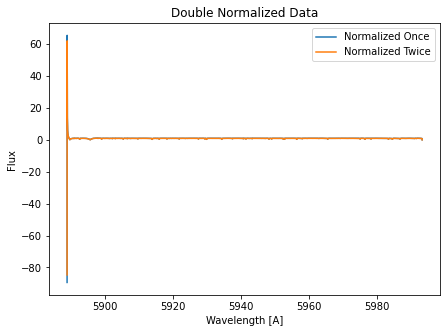

In [4077]:
flux98 = np.percentile(first_normalized_flux, 98)
normalized_flux = first_normalized_flux / flux98

plt.plot(wave, first_normalized_flux, label = 'Normalized Once')
plt.plot(wave, normalized_flux, label = 'Normalized Twice')
plt.legend()
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Double Normalized Data')
plt.show()

In [4078]:
star2 = 'HD3093'
Wave_Path2 = '/mnt_home/malikb/code/apf_wav.fits'
Flux_Path2 = '/mnt_home/malikb/code/rald.306.fits'

wl_file2 = fits.open(Wave_Path2)
fl_file2 = fits.open(Flux_Path2)
wl_image2 = wl_file2[0].data
fl_image2 = fl_file2[0].data

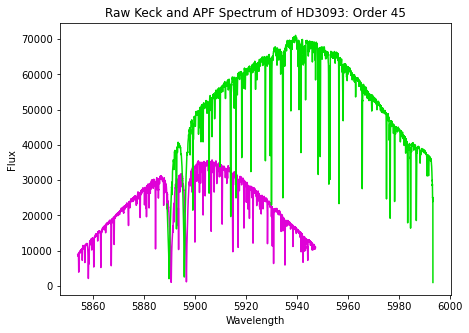

In [4079]:
plt.rcParams["figure.figsize"] = (7,5)

order2 = 45
wave2 = (wl_image2[order2])
flux2 = (fl_image2[order2][:-1])

plt.plot(wave2,flux2, "#DF01D7")

plt.plot(wave,flux,"#01DF01")
plt.title('Raw Keck and APF Spectrum of ' + star2 + ': Order ' + str(order2))
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

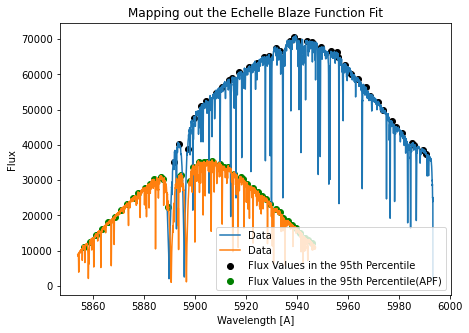

In [4080]:
bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave2) - (bin)), step = bin):
    fl_values = []
    for j in np.arange(i, i + bin, step = 1):
        value2 = flux2[j]
        fl_values = np.append(fl_values, value2)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin2 = np.percentile(fl_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function2 = lambda list_value : abs(list_value - flux_in_bin2)
    flux_in_bin2 = min(fl_values.tolist(), key=absolute_difference_function2)
    index_in_bin2 = fl_values.tolist().index(flux_in_bin2)
    index = i + index_in_bin2
    indices = np.append(indices, index)

# these lists will contain the wavelength and flux values at each index in 'indices'
wa_values = []
fl_values = []

for index in indices:
    ind = int(index)
    wa_values = np.append(wa_values, wave2[ind])
    fl_values = np.append(fl_values, flux2[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.plot(wave2, flux2, label = 'Data')
plt.scatter(wave_values, flux_values, color = 'black', label = 'Flux Values in the 95th Percentile')
plt.scatter(wa_values, fl_values, color = 'green', label = 'Flux Values in the 95th Percentile(APF)')
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

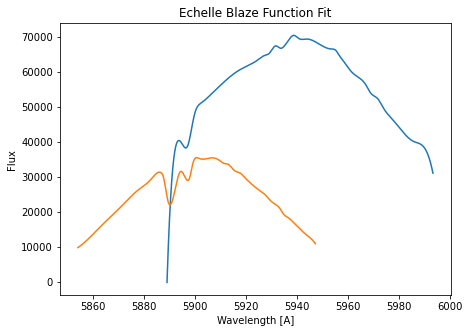

In [4081]:
spl2 = splrep(wa_values, fl_values, s = 500000)
flux_fit2 = splev(wave2, spl2)
plt.plot(wave, flux_fit)
plt.plot(wave2, flux_fit2)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

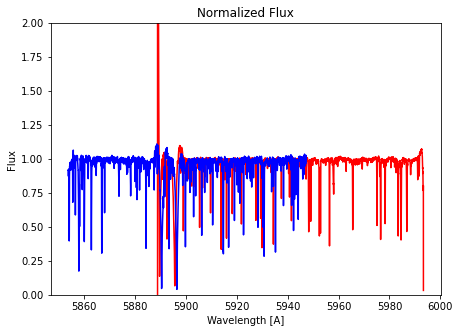

In [4082]:
first_normalized_flux2 = flux2 / flux_fit2
plt.plot(wave, first_normalized_flux, "r")
plt.plot(wave2, first_normalized_flux2, "b")
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.ylim(0,2)
plt.show()

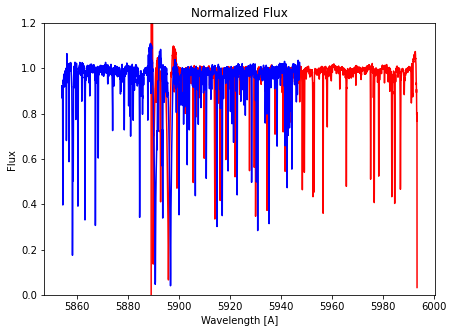

In [4083]:
plt.plot(wave, first_normalized_flux, "r")
plt.plot(wave2, first_normalized_flux2, "b")
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.ylim(0,1.2)
plt.show()

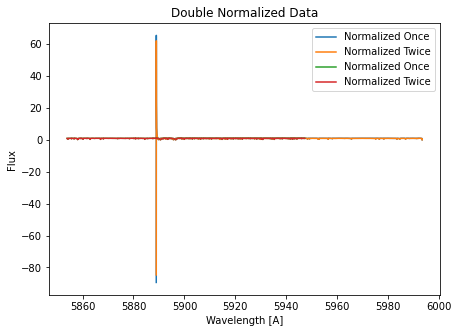

In [4084]:
flux982 = np.percentile(first_normalized_flux2, 98)
normalized_flux2 = first_normalized_flux2 / flux982

plt.plot(wave, first_normalized_flux, label = 'Normalized Once')
plt.plot(wave, normalized_flux, label = 'Normalized Twice')
plt.plot(wave2, first_normalized_flux2, label = 'Normalized Once')
plt.plot(wave2, normalized_flux2, label = 'Normalized Twice')
plt.legend()
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Double Normalized Data')
plt.show()

In [4085]:
print(np.min(flux), np.max(flux), np.min(flux2), np.max(flux2))

1000.5 71097.02 1031.6837 35755.55


In [4086]:
print(len(flux2))

4607


In [4087]:
print(np.min(first_normalized_flux), np.max(first_normalized_flux), np.min(first_normalized_flux2), np.max(first_normalized_flux2))

-89.42363769437955 65.53374108947185 0.04000119686251455 1.1099317199204046


In [4088]:
first_normalized_flux2[0:50]

array([0.91820361, 0.91987407, 0.91355616, 0.87488112, 0.92300712,
       0.86774961, 0.92174834, 0.92410694, 0.91400188, 0.90746563,
       0.90124076, 0.81620528, 0.68207826, 0.48199374, 0.39652312,
       0.42601261, 0.65591294, 0.72496779, 0.87610303, 0.91497564,
       0.93321873, 0.94878261, 0.9301297 , 0.93110917, 0.93812735,
       0.94824341, 0.95476426, 0.95416264, 0.96364256, 0.97406607,
       0.96310883, 0.95970085, 0.96481065, 0.95669746, 0.97138982,
       0.96932057, 0.9533369 , 0.94995616, 0.92091648, 0.9172713 ,
       0.9210901 , 0.9494852 , 0.9543654 , 0.96800257, 0.94939027,
       0.97566126, 0.96857112, 0.96705105, 0.9765006 , 0.97682079])

In [4089]:
print(np.min(wave), np.max(wave), np.min(wave2), np.max(wave2))

5888.935518221629 5993.34031688577 5853.921788718362 5947.206137172951


In [4090]:
wave[0:50]

array([5888.93551822, 5888.96329999, 5888.9910814 , 5889.01886245,
       5889.04664316, 5889.0744235 , 5889.10220349, 5889.12998313,
       5889.1577624 , 5889.18554132, 5889.21331987, 5889.24109807,
       5889.2688759 , 5889.29665337, 5889.32443048, 5889.35220723,
       5889.37998361, 5889.40775962, 5889.43553527, 5889.46331055,
       5889.49108546, 5889.51886001, 5889.54663418, 5889.57440799,
       5889.60218142, 5889.62995448, 5889.65772717, 5889.68549948,
       5889.71327142, 5889.74104299, 5889.76881418, 5889.79658499,
       5889.82435543, 5889.85212548, 5889.87989516, 5889.90766446,
       5889.93543338, 5889.96320191, 5889.99097006, 5890.01873783,
       5890.04650522, 5890.07427222, 5890.10203884, 5890.12980506,
       5890.15757091, 5890.18533636, 5890.21310143, 5890.2408661 ,
       5890.26863039, 5890.29639428])

In [4091]:
print(wave[50]-wave[0])

1.3886395655663364


In [4092]:
print(wave2[50]-wave2[0])

1.2479002286281684


In [4093]:
first_normalized_flux3 = first_normalized_flux2[1476:4606]

In [4094]:
flux3=flux2[1476:4606]

In [4095]:
print(first_normalized_flux2[1476])

1.016926592929785


In [4096]:
print(first_normalized_flux2[4606])

1.0007474448679043


In [4097]:
wave2[1476]

5888.920620168739

In [4098]:
wave2[4606]

5947.206137172951

In [4099]:
print(np.min(wave), np.max(wave2))

5888.935518221629 5947.206137172951


In [4100]:
wave3 = wave2[1476:4606]

In [4101]:
print(np.min(wave3), np.max(wave3))

5888.920620168739 5947.191829349001


In [4102]:
print(wave3[1]-wave3[0])

0.02293493687739101


In [4103]:
print(first_normalized_flux3[1]-first_normalized_flux3[0])

0.05961554123184509


In [4104]:
print(len(first_normalized_flux3))

3130


In [4105]:
print(len(wave3))

3130


(0.0, 1.2)

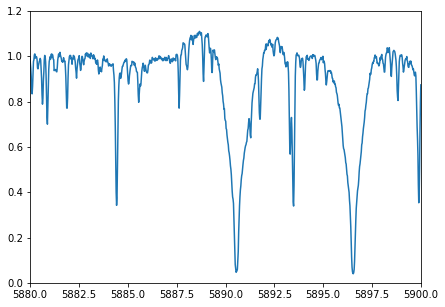

In [4106]:
plt.plot(wave2, first_normalized_flux2)
plt.xlim(5880, 5900)
plt.ylim(0,1.2)

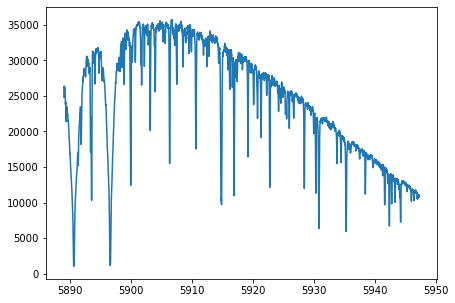

In [4107]:
plt.plot(wave3, flux3)

Text(0.5, 1.0, 'Overlapping Area between APF and Keck wavelength Solution')

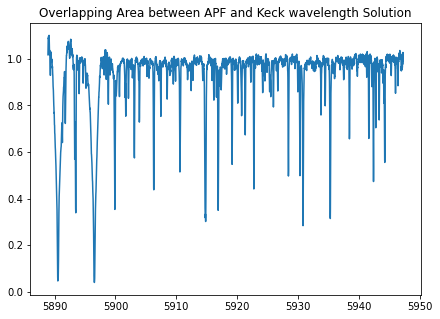

In [4108]:
#plt.plot(wave2[1500:2000], first_normalized_flux2[1500:2000])
#wave22 = wave2[1500:2000]
#first_normalized_flux22 = first_normalized_flux2[1500:2000]
plt.plot(wave3, first_normalized_flux3)
plt.title("Overlapping Area between APF and Keck wavelength Solution")

In [4109]:
intfunc = spi.interp1d(wave, first_normalized_flux, axis=0, fill_value="extrapolate")

In [4110]:
flux4 = intfunc(wave2)

In [4111]:
flux5 = flux4 + 1 

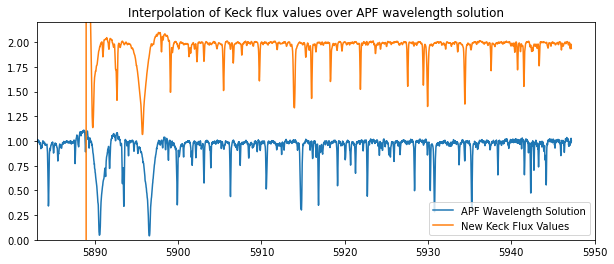

In [4112]:
plt.figure(figsize=(10,4))
plt.plot(wave2, first_normalized_flux2, label = "APF Wavelength Solution") 
plt.plot(wave2, flux5, label = 'New Keck Flux Values')       
plt.ylim(0,2.2)
plt.xlim(5883, 5950)
plt.title("Interpolation of Keck flux values over APF wavelength solution")
plt.legend()
plt.show()

In [4113]:
keck_file = fits.open('temp_sky.fits')

In [4114]:
image = keck_file[0].data

Text(0.5, 1.0, '2D array data')

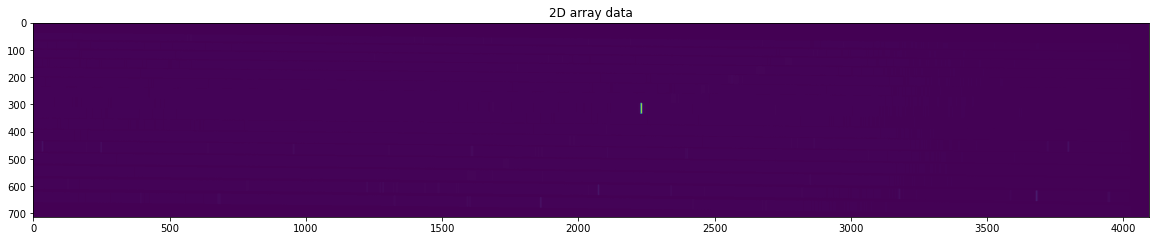

In [4115]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.title('2D array data')

(0.0, 4021.0)

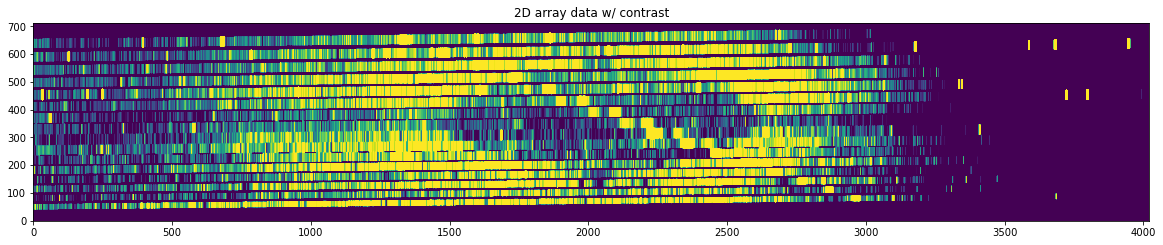

In [4116]:
plt.figure(figsize=(20,20))
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('2D array data w/ contrast')
plt.xlim(0,4021)

Text(0.5, 1.0, 'small patch [450:460, 0:1500] of telluric lines')

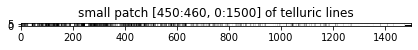

In [4117]:
patch = image[450:460, 0:1500]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
plt.title('small patch [450:460, 0:1500] of telluric lines')

Text(0.5, 1.0, 'small patch [450:460, 0:1500] of telluric lines')

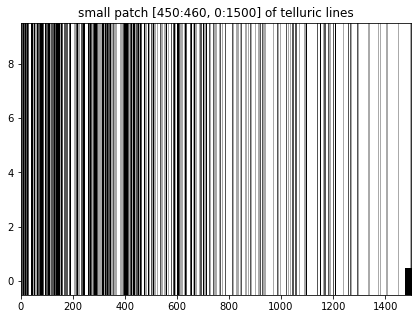

In [4118]:
plt.imshow(image[450:460, 0:1500], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
plt.title('small patch [450:460, 0:1500] of telluric lines')

In [4119]:
patch = image[450:460, 0:1500]
patch.size

15000

In [4120]:
telluric_1D = np.sum(patch, axis = 0)

(0.0, 500.0)

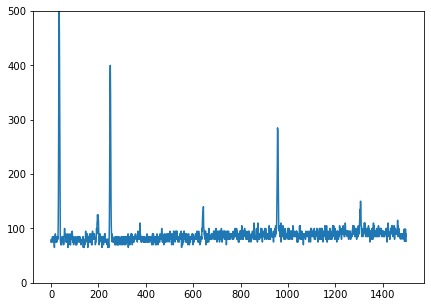

In [4133]:
plt.plot(telluric_1D)
plt.ylim(0,500)